## Rank Features of a Smart Phone : Classify and Rank Datasets.

### Dataset Information

1. battery_power - Total energy a battery can store in one time measured in mAh <br>
2. blue - Has bluetooth (1) or not (0) <br>
3. clock_speed - speed at which microprocessor executes instructions <br>
4. dual_sim - Has dual sim support (1) or not (0) <br>
5. fc - Front Camera mega pixels <br>
6. four_g - Has 4G (1) or not (0) <br>
7. int_memory - Internal Memory in Gigabytes <br>
8. m_dep - Mobile Depth in cm <br>
9. mobile_wt - Weight of mobile phone <br>
10. n_cores - Number of cores of processor <br>
11. pc - Primary Camera mega pixels <br>
12. px_height - Pixel Resolution Height <br>
13. px_width - Pixel Resolution Width <br>
14. ram - Random Access Memory in Mega Bytes <br>
15. sc_h - Screen Height of mobile in cm <br>
16. sc_w - Screen Width of mobile in cm <br>
17. talk_time - longest time that a single battery charge will last <br>
18. three_g - Has 3G (1) or not (0) <br>
19. touch_screen - Has touch screen (1) or not (0) <br>
20. wifi - Has wifi (1) or not (0) <br>
21. price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 1 - Loading the dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Step 2 - Descriptive Statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.shape

(2000, 21)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [6]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [8]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### There are no null values in the dataset

In [10]:
data.duplicated().sum()

0

#### There are no duplicated values

In [11]:
# Checking distribution of data
freqgraph = data.select_dtypes(include = ['float','int'])
freqgraph

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


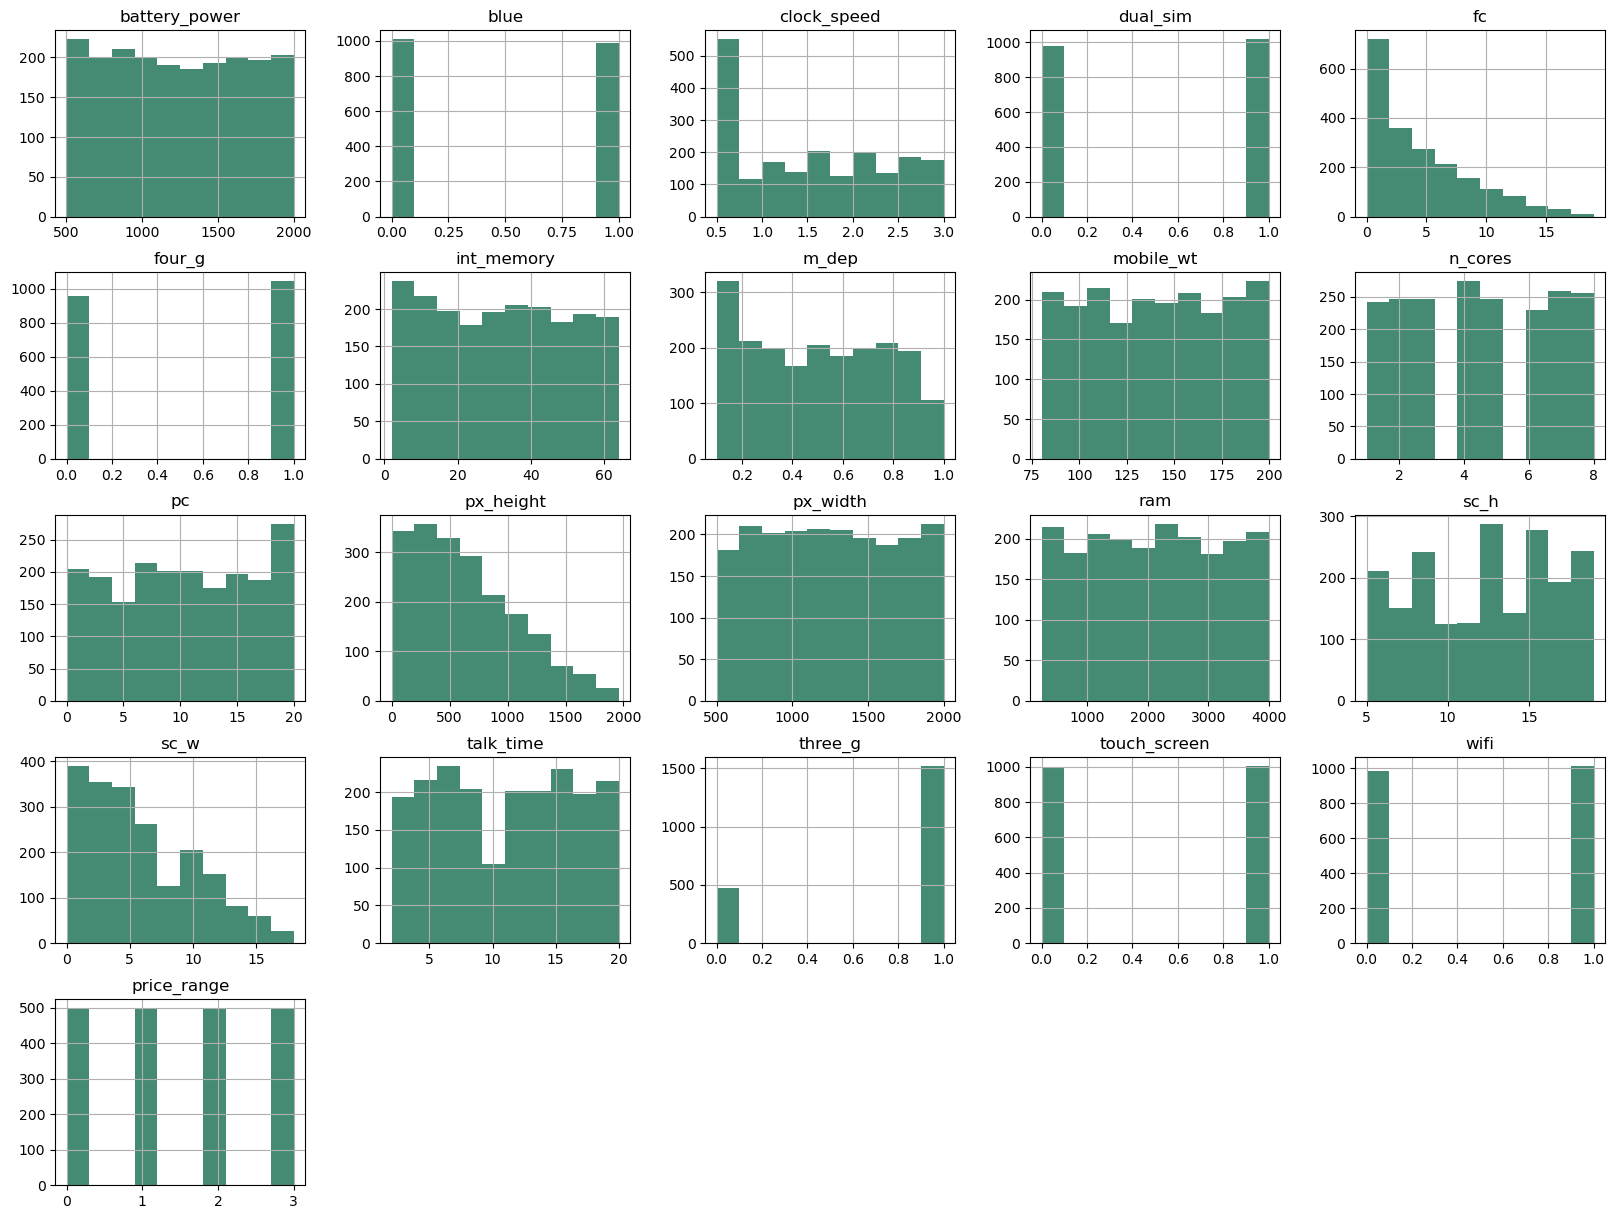

In [12]:
freqgraph.hist(figsize=(20,15),color = '#458B74')
plt.show()

### Numerical Variables and Categorical Variables
#### We have 7 categorical variables and 14 numerical variables.
#### Numerical -  battery_power, clock_speed, fc , int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width,  ram, sc_h,  sc_h, sc_w, talk_time
#### Categorical - blue, dual_sim, four_g, three_g , touch_screen, wifi, price_range

In [13]:
cat_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']
for i in cat_col:
    print('the number of unique values in',i,'is : ',data[i].value_counts())

the number of unique values in blue is :  0    1010
1     990
Name: blue, dtype: int64
the number of unique values in dual_sim is :  1    1019
0     981
Name: dual_sim, dtype: int64
the number of unique values in four_g is :  1    1043
0     957
Name: four_g, dtype: int64
the number of unique values in three_g is :  1    1523
0     477
Name: three_g, dtype: int64
the number of unique values in touch_screen is :  1    1006
0     994
Name: touch_screen, dtype: int64
the number of unique values in wifi is :  1    1014
0     986
Name: wifi, dtype: int64
the number of unique values in price_range is :  1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


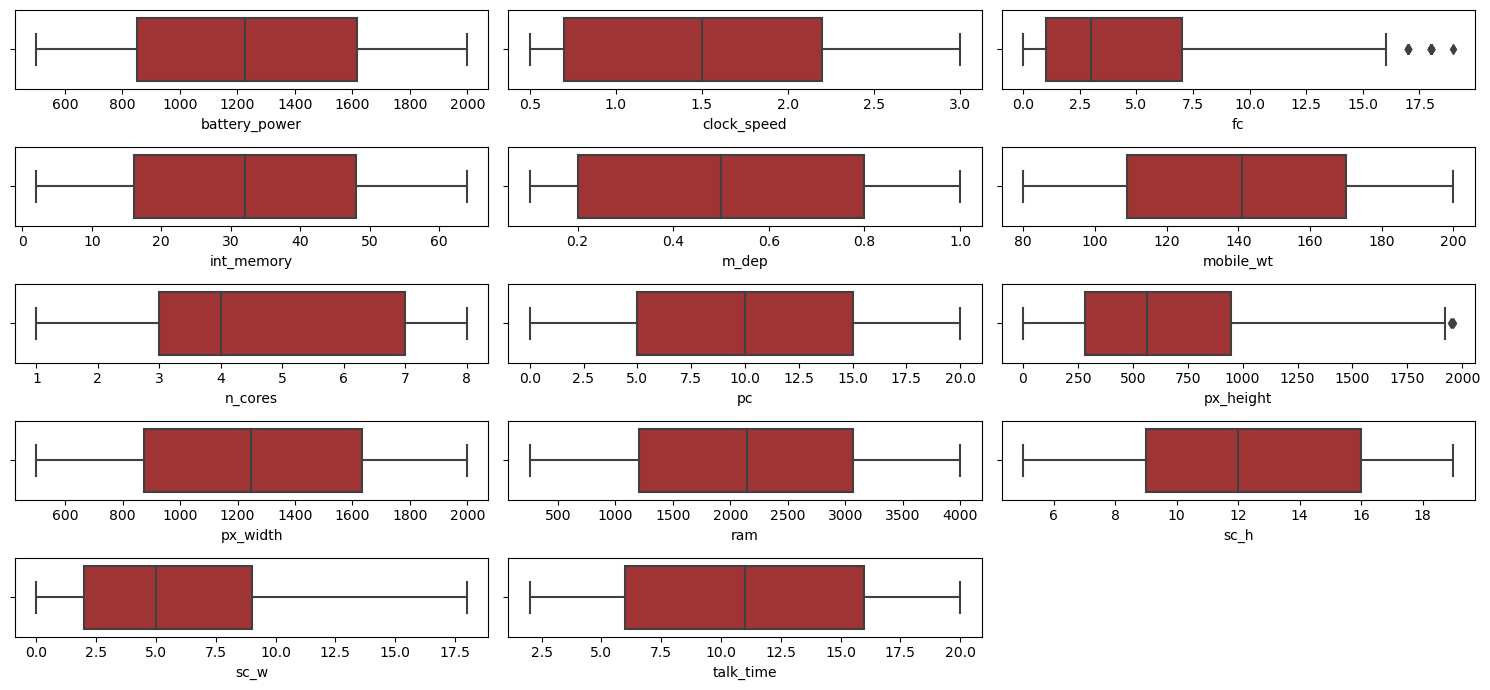

In [14]:
# Checking Outliers

num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[num_col[i]],orient='v', color = '#B22222')
    plt.tight_layout()

#### There are outliers in the columns 'fc', 'three_g' and 'px_height'. Since these are genuine values we need not replace or remove it.

### Step 3 - Exploratory Data Analysis

In [15]:
data.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [16]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

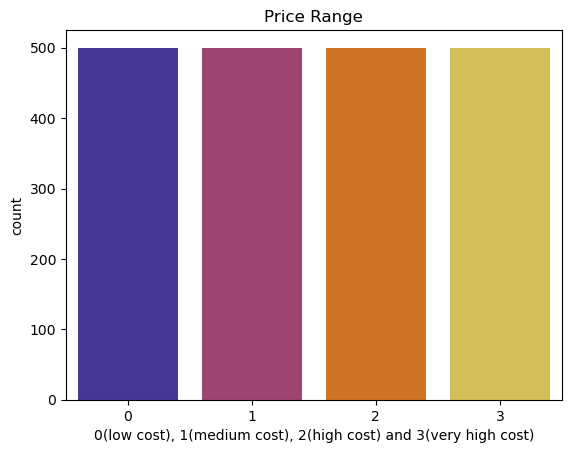

In [17]:
# Count plot for Price range
sns.countplot(x='price_range',data=data, palette='CMRmap')
plt.title("Price Range")
plt.xlabel('0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)')
plt.show() 

#### Fromt the count plot of target column above, it is understood that the dataset is balanced.

### Plotting Categorical Features using Pie Chart

In [18]:
data['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

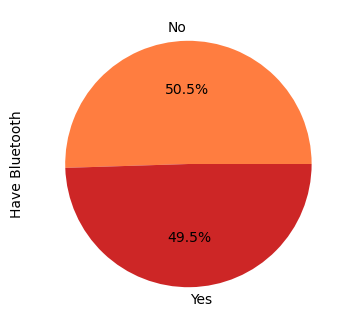

In [19]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
data['blue'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Bluetooth')
plt.show()

In [20]:
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

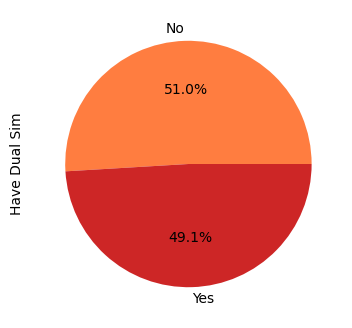

In [21]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
data['dual_sim'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Dual Sim')
plt.show()

In [22]:
data['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

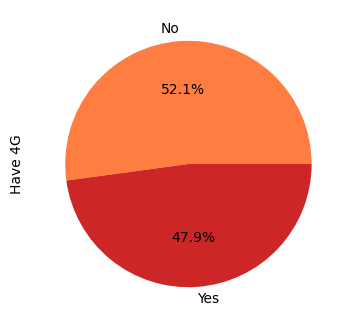

In [23]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
data['four_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have 4G')
plt.show()

In [24]:
data['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

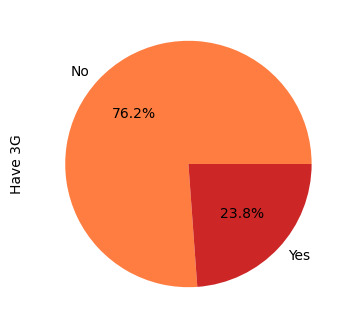

In [25]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
data['three_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have 3G')
plt.show()

In [26]:
data['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

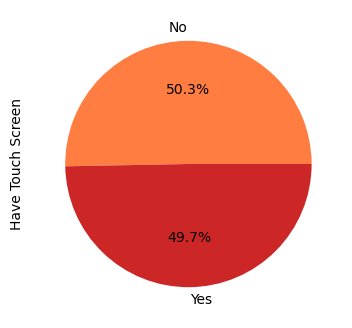

In [27]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
data['touch_screen'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Touch Screen')
plt.show()

In [28]:
data['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

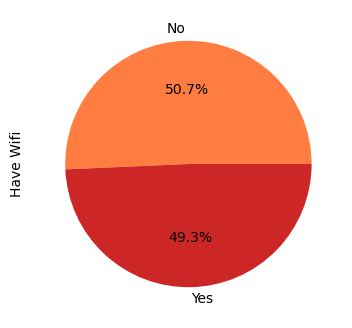

In [29]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
data['wifi'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Wifi')
plt.show()

In [30]:
data['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

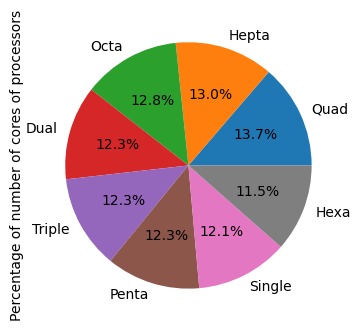

In [31]:
labels=['Quad','Hepta','Octa','Dual','Triple','Penta','Single','Hexa']
plt.figure(figsize=(5,5))
data['n_cores'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Percentage of number of cores of processors')
plt.show()

#### Observation
1. We can see that almost half of the phones have bluetooth, dual sim, 4G, touchscreen and wifi. <br>
2. Almost three-fourth of the phones have 3G. <br>
3. The different types of cores are also spread out almost evenly.<br>

### Count Plot for Various Columns

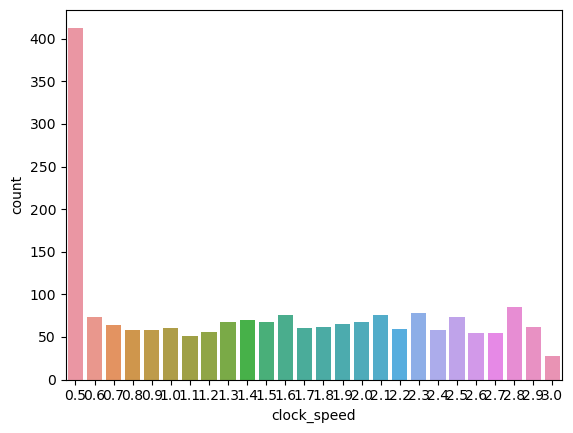

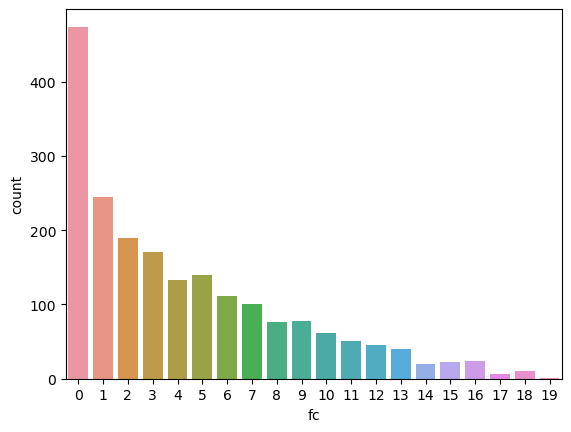

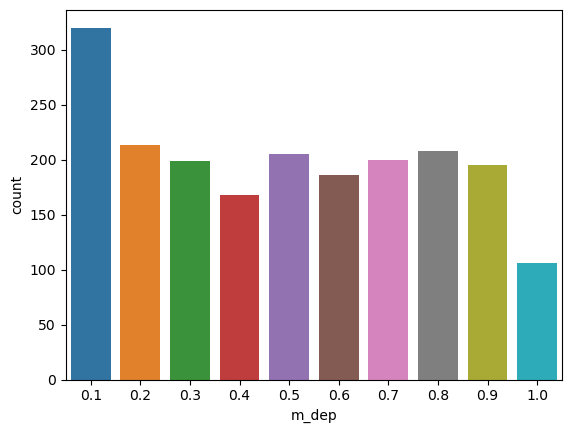

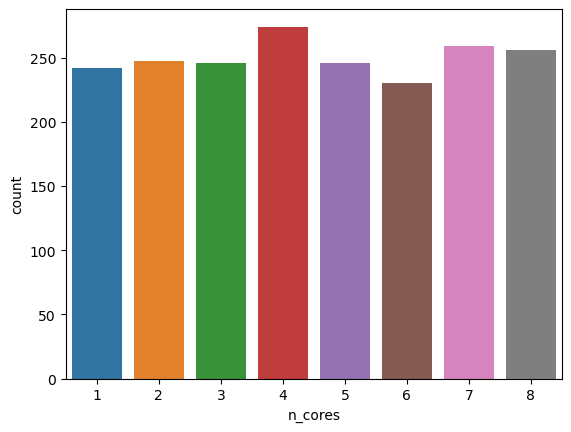

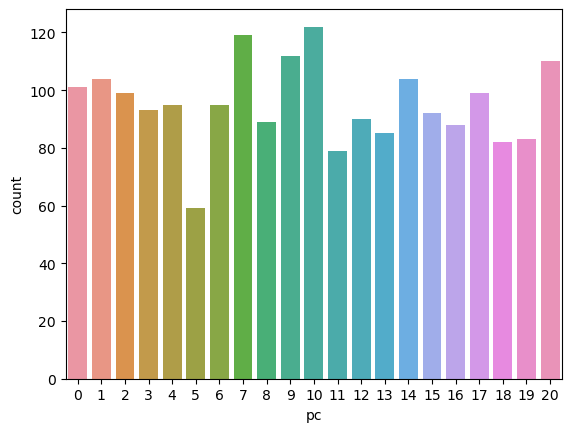

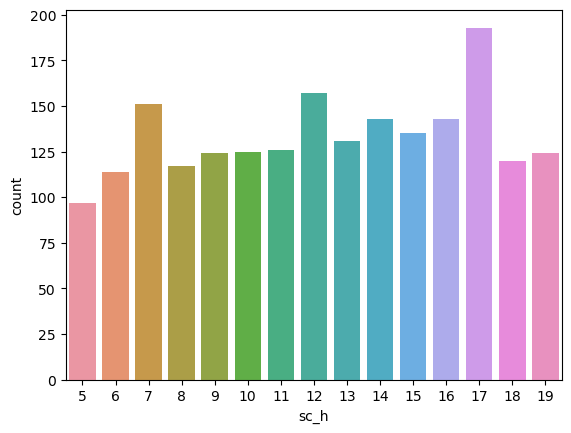

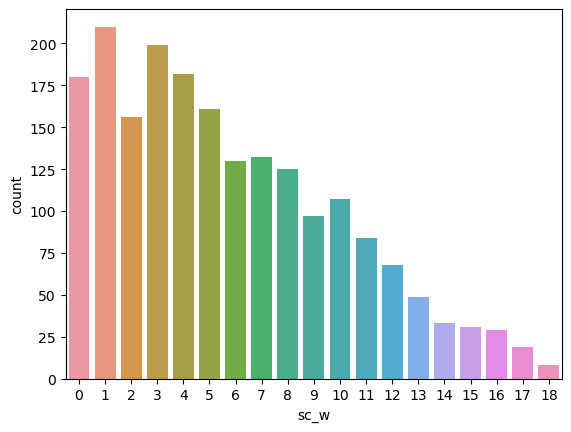

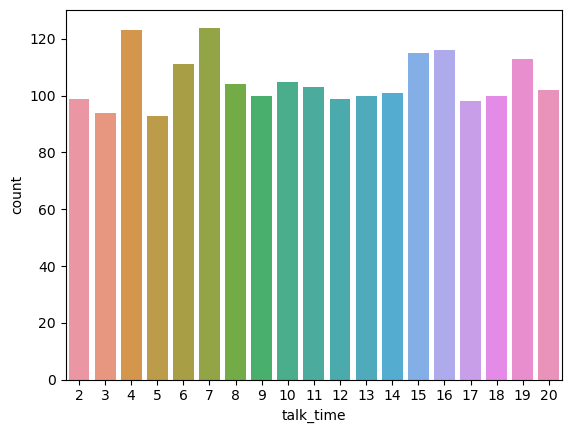

In [32]:
for i in num_col:
    if (data[i].nunique())<= 30:
        sns.countplot(x=data[i])
        plt.show()

### Observation
1. Majority of phones in this dataset have a front camera. Only a quarter of the phone in this dataset does not have front camera. <br>
2. Almost 6 % of phones in this dataset does not have camera. <br>
3. Talktime is evenly spread out. <br>

###  Plotting Numerical Features using Histogram

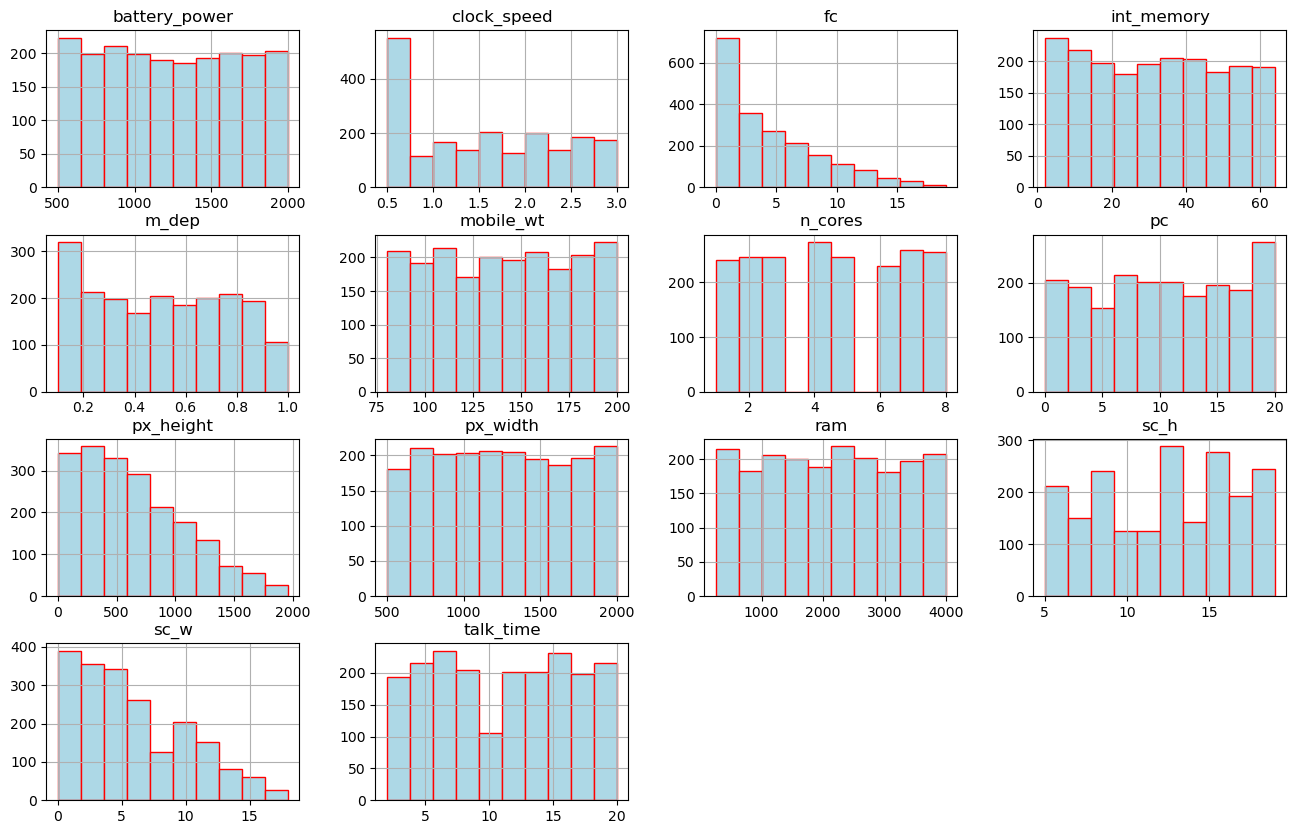

In [33]:
data.hist(num_col,figsize=(16,10), color = "lightblue", ec="red")
plt.show()

#### Observation
1. fc has exponential distribution <br>
2. the pixel height distribution is right skewed. <br>
3. others have multimodal distribution. <br>

### Line Plot of all columns

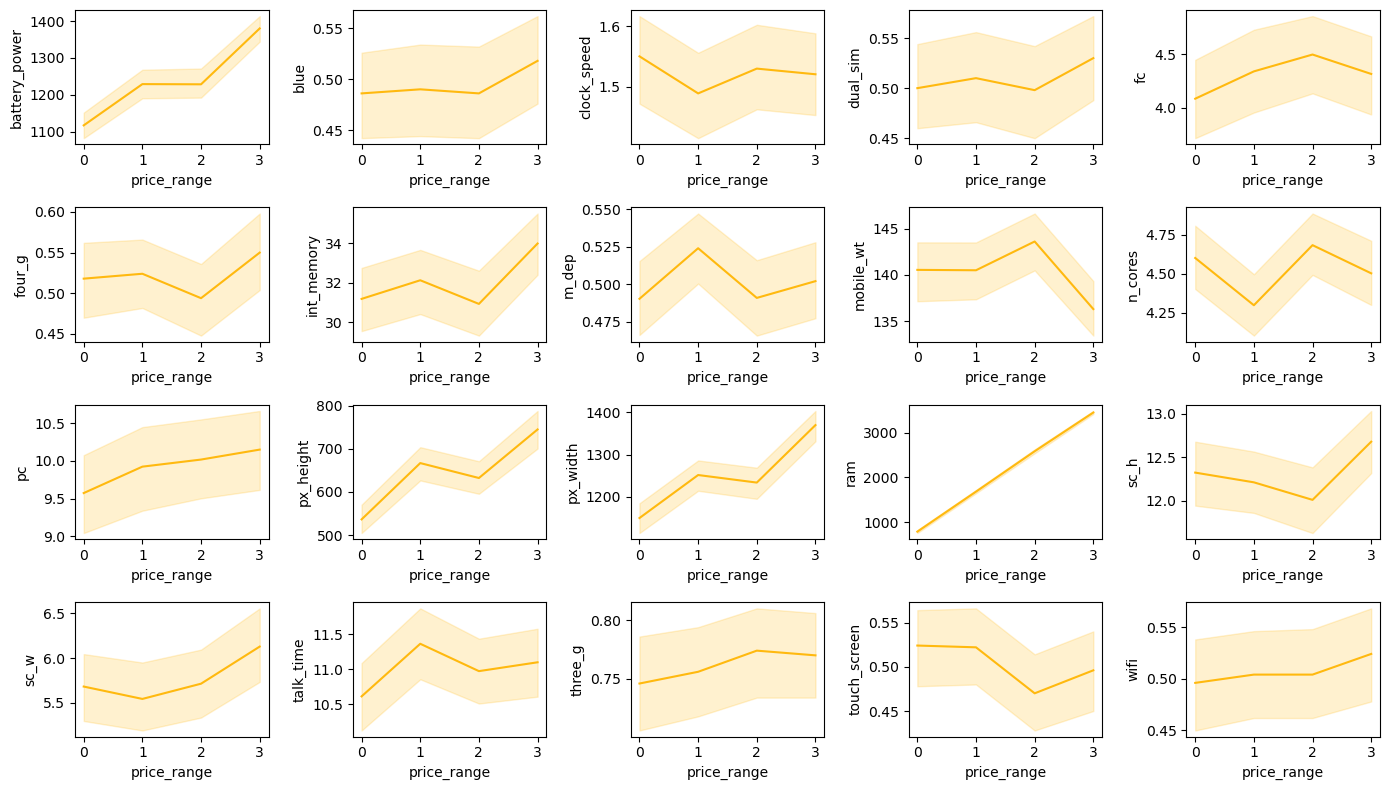

In [34]:
a=data.drop('price_range',axis=1)
plt.figure(figsize=(14,8))
for i, j in enumerate(a):
    plt.subplot(4,5, i+1)
    sns.lineplot(y=data[j],x=data["price_range"],color ='#FFB90F')
plt.tight_layout()

#### Observation

1. Higher the price range,higher the average ram size.
2. We can see that the higher the price range it tend to have a higher battery power except on the price range 1 to 2. It seems that from price range 1 to 2 there's no significant difference in the average battery power
3. Clock speed is highest for mobiles in lower price range.
4. The price range of 0 has more products with lower pixel width and pixel height while the highest price range has more products with higher pixel width and pixel height.
5. It seems that talk time doesn't really affect the price range.
6. Higher price range has a higher megapixel primary camera.

### Correlation Matrix

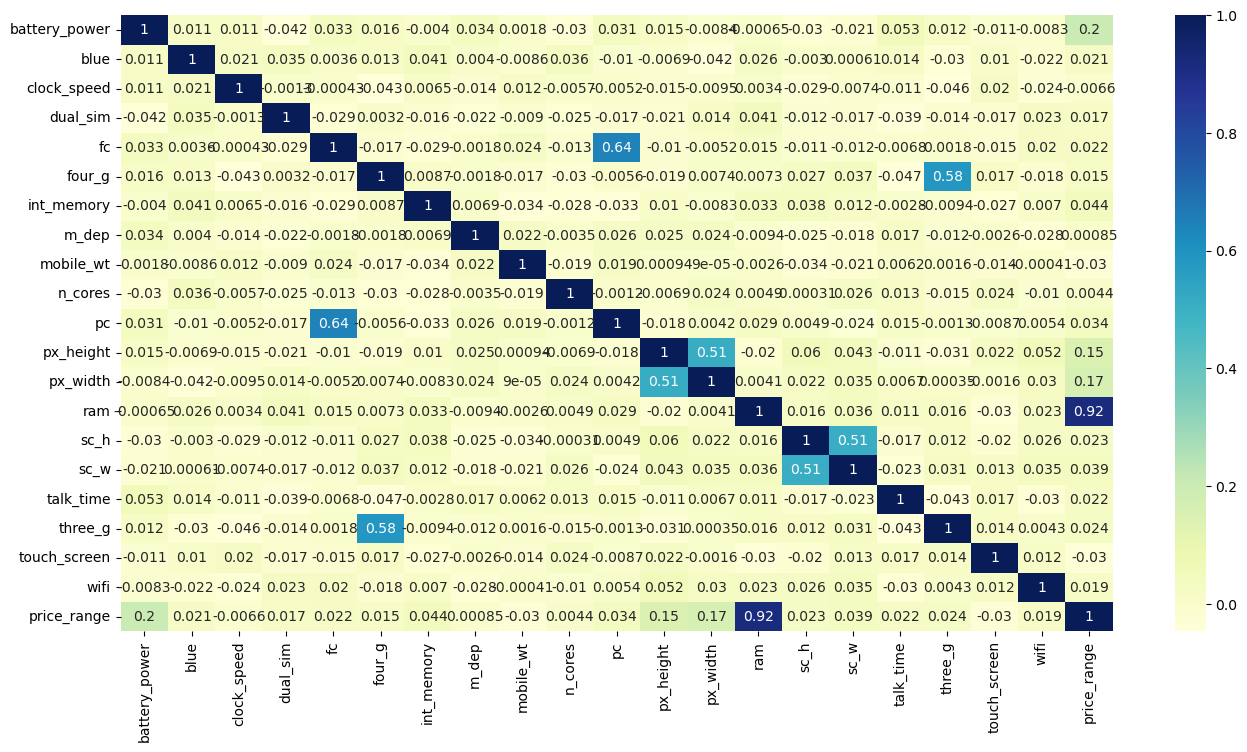

In [35]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Observation
1. Almost all features exhibit low correlation with each other. <br>
2. 'ram' is highly correlated with price range. <br>
3. None of the features are negatively correlated. <br>

### Step 4 - Data Preprocessing

### Feature Scaling

In [36]:
# Min-max scaling
# Removing categorical columns and performing scaling on numerical columns. 
df = data.drop(['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],axis=1)
X = data.drop(['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range'], axis=1)
X

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [37]:
df.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1


In [38]:
from sklearn.preprocessing import MinMaxScaler  #importing the required library for MinMax scaling
minmax = MinMaxScaler(feature_range=(0,1))  #creating instance
X= minmax.fit_transform(X)  #Performing MinMax scaling
X

array([[0.22778891, 0.68      , 0.05263158, ..., 0.28571429, 0.38888889,
        0.94444444],
       [0.34736139, 0.        , 0.        , ..., 0.85714286, 0.16666667,
        0.27777778],
       [0.04141617, 0.        , 0.10526316, ..., 0.42857143, 0.11111111,
        0.38888889],
       ...,
       [0.94188377, 0.16      , 0.05263158, ..., 0.28571429, 0.05555556,
        0.16666667],
       [0.6753507 , 0.16      , 0.21052632, ..., 0.92857143, 0.55555556,
        0.94444444],
       [0.00601202, 0.6       , 0.26315789, ..., 1.        , 0.22222222,
        0.        ]])

In [39]:
X = pd.DataFrame(X)         
X.columns = ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'] # Giving the columns their respective names
X

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444


In [40]:
df1 = X
df = pd.concat([df1,df],axis = 1)

In [41]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,...,0.285714,0.388889,0.944444,0,0,0,0,0,1,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,...,0.857143,0.166667,0.277778,1,1,1,1,1,0,2
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,...,0.428571,0.111111,0.388889,1,1,1,1,1,0,2
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,...,0.785714,0.444444,0.500000,1,0,0,1,0,0,2
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,...,0.214286,0.111111,0.722222,1,0,1,1,1,0,1


### Splitting Features and Target

In [42]:
# Split the dataset into features and target
x = df.drop('price_range', axis=1)
y = df['price_range']

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(x,y, test_size=0.25,random_state = 42)
ac_list = []
model_names = []

### Step 5 - Model building and Evaluation

### 1. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr = lr.fit(xtrain,ytrain)
ypred_lr = model_lr.predict(xtest)

In [45]:
# checking the validation of the model
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
print(classification_report(ytest,ypred_lr))
print('Accuracy score is:',accuracy_score(ytest,ypred_lr))
print('f1 score is:', f1_score(ytest, ypred_lr,average='weighted'))
al = accuracy_score(ytest,ypred_lr)
ac_list.append(al)
model_names.append('LR')

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       132
           1       0.86      0.90      0.88       118
           2       0.92      0.82      0.87       120
           3       0.93      0.98      0.95       130

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

Accuracy score is: 0.918
f1 score is: 0.917334898508308


### 2. Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(xtrain,ytrain)
ypred_random = rf_clf.predict(xtest)
print(classification_report(ytest,ypred_random))
print('Accuracy score is:',accuracy_score(ytest,ypred_random))
print('f1 score is:', f1_score(ytest, ypred_random,average='weighted'))
ar = accuracy_score(ytest,ypred_random)
ac_list.append(ar)
model_names.append('RF')

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       132
           1       0.80      0.82      0.81       118
           2       0.82      0.75      0.78       120
           3       0.90      0.91      0.90       130

    accuracy                           0.86       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.86      0.86      0.86       500

Accuracy score is: 0.858
f1 score is: 0.8570788736362921


### 3. Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
#creating an instance
dt_clf = DecisionTreeClassifier(random_state =42)
#fitting the model
dt_clf.fit(xtrain,ytrain)
ypred_dt = dt_clf.predict(xtest)
print(classification_report(ytest,ypred_dt))
print('Accuracy score is:',accuracy_score(ytest,ypred_dt))
print('f1 score is:', f1_score(ytest, ypred_dt,average='weighted'))
ad = accuracy_score(ytest,ypred_dt)
ac_list.append(ad)
model_names.append('DT')

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       132
           1       0.71      0.78      0.74       118
           2       0.78      0.71      0.74       120
           3       0.87      0.91      0.89       130

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500

Accuracy score is: 0.812
f1 score is: 0.8119860973945044


### 4. KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
metric_k= []
neighbors = np.arange(3, 15)

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model_knn =knn.fit(xtrain,ytrain)
  y_pred_knn = model_knn.predict(xtest)
  acc=accuracy_score(ytest,y_pred_knn)
  metric_k.append(acc)
# accuracy array
metric_k 

[0.374, 0.38, 0.414, 0.42, 0.426, 0.416, 0.44, 0.424, 0.42, 0.436, 0.47, 0.464]

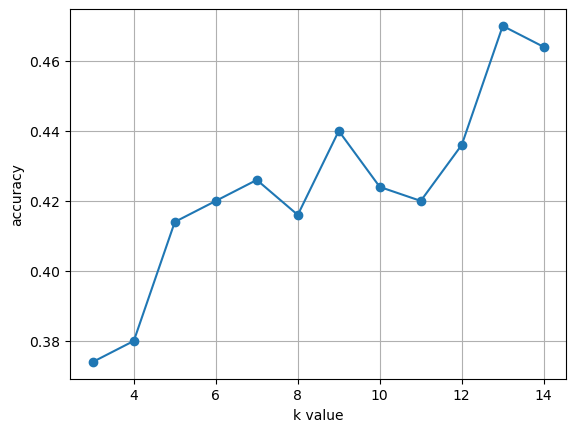

In [49]:
#plotting the accuracy for each k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [50]:
# accuracy is more for point 14 so we can create model using k = 13
knn = KNeighborsClassifier(n_neighbors=13)
model_knn = knn.fit(xtrain,ytrain)
y_pred_knn = model_knn.predict(xtest)
print(classification_report(ytest,y_pred_knn))
print('Accuracy score is:',accuracy_score(ytest,y_pred_knn))
print('f1 score is:', f1_score(ytest, y_pred_knn,average='weighted'))
ak = accuracy_score(ytest,y_pred_knn)
ac_list.append(ak)
model_names.append('KNN')

              precision    recall  f1-score   support

           0       0.61      0.66      0.64       132
           1       0.32      0.37      0.35       118
           2       0.36      0.40      0.38       120
           3       0.65      0.43      0.52       130

    accuracy                           0.47       500
   macro avg       0.49      0.47      0.47       500
weighted avg       0.49      0.47      0.47       500

Accuracy score is: 0.47
f1 score is: 0.4742605282826838


### 5. Gradient Boost Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
# Define the gradient boosting classifier model
gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model=gb.fit(xtrain, ytrain)
y_pred_gb = gb_model.predict(xtest)
print(classification_report(ytest,y_pred_gb))
print('Accuracy score is:',accuracy_score(ytest,y_pred_gb))
print('f1 score is:', f1_score(ytest, y_pred_gb,average='weighted'))
ag = accuracy_score(ytest,y_pred_gb)
ac_list.append(ag)
model_names.append('GB')

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       132
           1       0.84      0.87      0.85       118
           2       0.84      0.82      0.83       120
           3       0.92      0.92      0.92       130

    accuracy                           0.89       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.89      0.89      0.89       500

Accuracy score is: 0.886
f1 score is: 0.8859835361938733


### 6. XGBoost Classifier

In [52]:
#! pip install xgboost

In [53]:
import xgboost as xgb
# define the XGBoost model
model = xgb.XGBClassifier()
# train the model on the training data
xgb_model = model.fit(xtrain, ytrain)
# make predictions on the testing data
y_pred_xgb = xgb_model.predict(xtest)
print(classification_report(ytest,y_pred_xgb))
print('Accuracy score is:',accuracy_score(ytest,y_pred_xgb))
axg = accuracy_score(ytest,y_pred_xgb)
ac_list.append(axg)
model_names.append('XGB')

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       132
           1       0.84      0.87      0.85       118
           2       0.85      0.81      0.83       120
           3       0.92      0.92      0.92       130

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Accuracy score is: 0.888


### Choosing Best Model 

In [54]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': 'Accuracy'}, inplace=True)
round(model_ac*100, 3)

,Accuracy
LR,91.8
RF,85.8
DT,81.2
KNN,47.0
GB,88.6
XGB,88.8


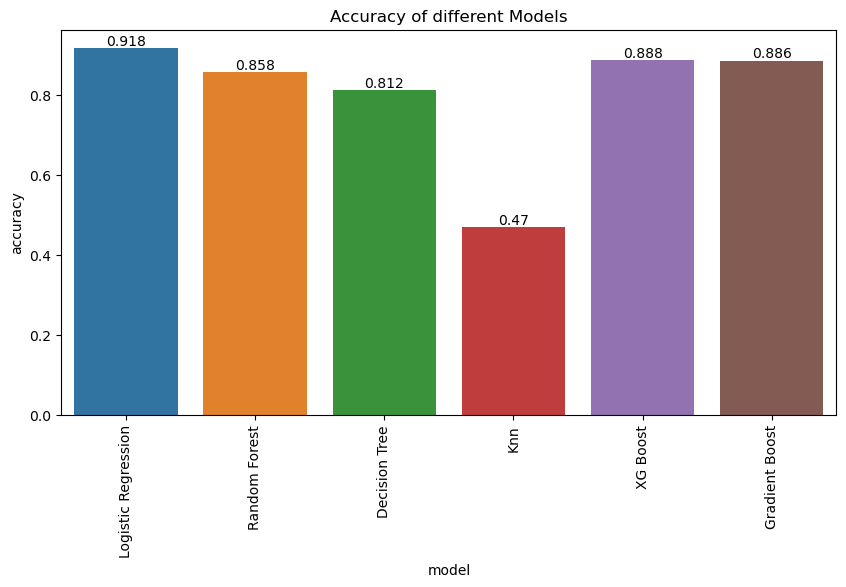

In [55]:
classifiers=["Logistic Regression","Random Forest","Decision Tree","Knn","XG Boost","Gradient Boost"]
accuracy = [al,ar,ad,ak,axg,ag]
f1_score = [0.91,0.86,0.80,0.47,0.86,0.88]
df_af=pd.DataFrame({'model':classifiers,"accuracy":accuracy,"f1-score":f1_score})
plt.figure(figsize=(10,5))
bx = sns.barplot(data=df_af,x="model",y="accuracy")
bx.bar_label(bx.containers[0])
plt.title('Accuracy of different Models')
plt.xticks(rotation ='90')
plt.show()

### Logistic Regression is the best model

#### We need to identify the most important features and rank the features based on their importance scores.
#### We could Identify the most important features using feature selection techniques such as correlation analysis, mutual information, and feature importance scores from machine learning models.

### Step 6 - Ranking

#### Identifying Important features and Ranking them
### 1.Logistic Regression Model

Logistic regression does not have an attribute for ranking feature. If you want to visualize the coefficients that you 
can use to show feature importance.

After the model is fitted, the coefficients are stored in the coef_ property.

The following code trains the logistic regression model, creates a data frame in which the attributes are stored with their respective coefficients, and sorts that data frame by the coefficient in descending order:

In [56]:
importance_scores_lr = pd.DataFrame(data ={
    'Attribute': xtrain.columns,
    'Importance': np.abs(model_lr.coef_[0])
})

importance_scores_lr = importance_scores_lr.sort_values(by='Importance', ascending=False)

In [57]:
# Create a DataFrame to store the feature names and their importance scores
feature_scores = pd.DataFrame({'Feature': x.columns,'Importance': np.abs(model_lr.coef_[0])})

# Sort the features based on their importance scores in descending order
feature_scores = feature_scores.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
10     1            ram   13.750098
0      2  battery_power    3.283383
8      3      px_height    2.501970
9      4       px_width    1.942011
5      5      mobile_wt    0.466854
3      6     int_memory    0.266778
1      7    clock_speed    0.241827
2      8             fc    0.153247
18     9   touch_screen    0.122276
17    10        three_g    0.106527
13    11      talk_time    0.097583
12    12           sc_w    0.064259
16    13         four_g    0.062252
15    14       dual_sim    0.060494
11    15           sc_h    0.039547
4     16          m_dep    0.038169
7     17             pc    0.036586
14    18           blue    0.033485
19    19           wifi    0.016101
6     20        n_cores    0.006754


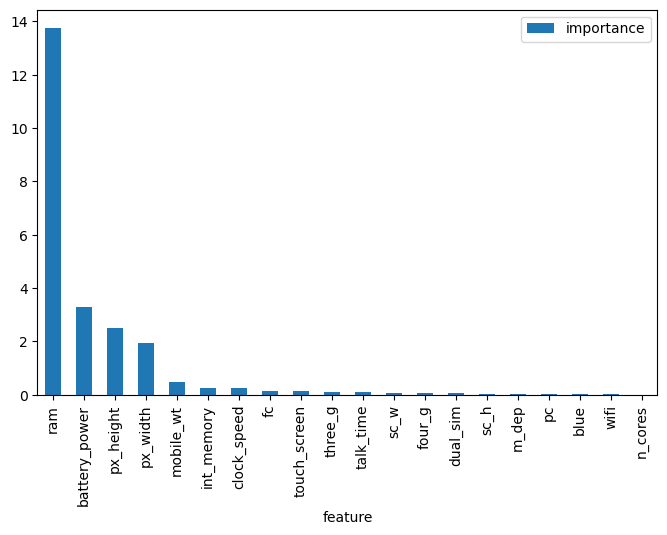

In [58]:
importance_scores_lr = pd.DataFrame({'feature': x.columns, 'importance': np.abs(model_lr.coef_[0])})
importance_scores_lr = importance_scores_lr.sort_values('importance',ascending=False)
importance_scores_lr.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

### 2. Gradient Boost Model

In [59]:
# Compute the feature importance scores using a machine learning model
importance_scores_gb = gb_model.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_scores_gb = pd.DataFrame({'Feature': x.columns, 'Importance': importance_scores_gb})

# Sort the features based on their importance scores in descending order
feature_scores_gb = feature_scores_gb.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores_gb['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores_gb[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
10     1            ram    0.786308
0      2  battery_power    0.113375
8      3      px_height    0.057278
9      4       px_width    0.023127
5      5      mobile_wt    0.005064
3      6     int_memory    0.004513
4      7          m_dep    0.003089
2      8             fc    0.001807
11     9           sc_h    0.001153
13    10      talk_time    0.001021
12    11           sc_w    0.000929
6     12        n_cores    0.000767
19    13           wifi    0.000431
7     14             pc    0.000374
1     15    clock_speed    0.000292
16    16         four_g    0.000236
18    17   touch_screen    0.000096
14    18           blue    0.000076
17    19        three_g    0.000049
15    20       dual_sim    0.000015


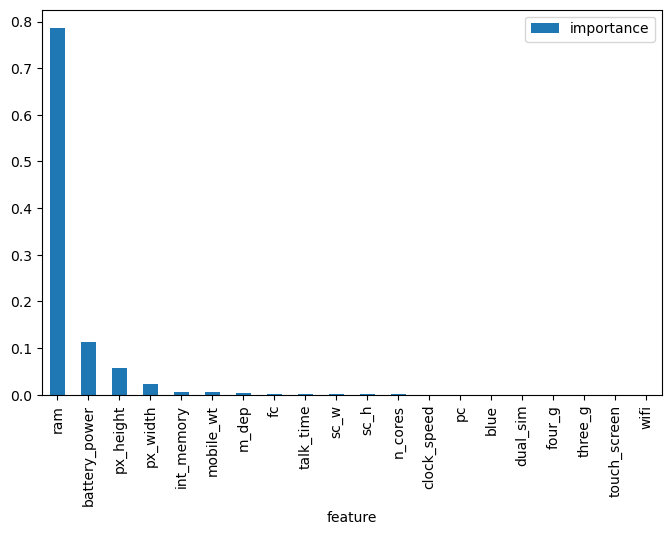

In [60]:
# Plotting features according to its importance
importance_scores_gb = pd.DataFrame({'feature': x.columns, 'importance': np.round(gb_model.feature_importances_,3)})
importance_scores_gb = importance_scores_gb.sort_values('importance',ascending=False)
importance_scores_gb.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

### 3. Random Forest Model

In [61]:
# Compute the feature importance scores using a machine learning model
importance_scores_rf = rf_clf.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_scores_rf = pd.DataFrame({'Feature': x.columns, 'Importance': importance_scores_rf})

# Sort the features based on their importance scores in descending order
feature_scores_rf = feature_scores_rf.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores_rf['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores_rf[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
10     1            ram    0.474765
0      2  battery_power    0.071549
8      3      px_height    0.058186
9      4       px_width    0.055684
5      5      mobile_wt    0.041746
3      6     int_memory    0.038153
7      7             pc    0.029728
13     8      talk_time    0.029522
1      9    clock_speed    0.029065
11    10           sc_h    0.028195
12    11           sc_w    0.028113
4     12          m_dep    0.026164
2     13             fc    0.025873
6     14        n_cores    0.023491
14    15           blue    0.007149
19    16           wifi    0.007134
15    17       dual_sim    0.006845
18    18   touch_screen    0.006779
16    19         four_g    0.006161
17    20        three_g    0.005698


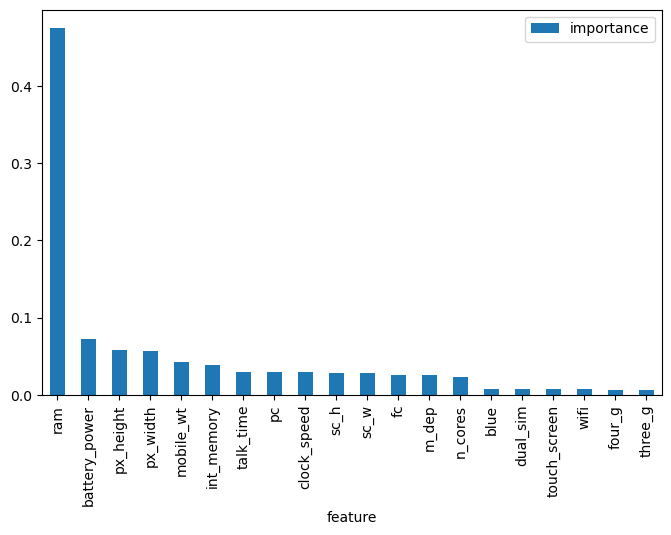

In [62]:
# Plotting features according to its importance
importance_scores_rf = pd.DataFrame({'feature': x.columns, 'importance': np.round(rf_clf.feature_importances_,3)})
importance_scores_rf = importance_scores_rf.sort_values('importance',ascending=False)
importance_scores_rf.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

### 4. Decision Tree Classifier

In [63]:
# Compute the feature importance scores using a machine learning model
importance_scores_dt = dt_clf.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_scores_dt= pd.DataFrame({'Feature': x.columns, 'Importance': importance_scores_dt})

# Sort the features based on their importance scores in descending order
feature_scores_dt = feature_scores_dt.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores_dt['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores_dt[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
10     1            ram    0.617593
0      2  battery_power    0.135573
8      3      px_height    0.091459
9      4       px_width    0.062716
5      5      mobile_wt    0.017670
13     6      talk_time    0.013251
4      7          m_dep    0.009775
7      8             pc    0.008226
1      9    clock_speed    0.007569
6     10        n_cores    0.007418
3     11     int_memory    0.007329
2     12             fc    0.007148
12    13           sc_w    0.006323
11    14           sc_h    0.005876
16    15         four_g    0.001185
14    16           blue    0.000889
15    17       dual_sim    0.000000
17    18        three_g    0.000000
18    19   touch_screen    0.000000
19    20           wifi    0.000000


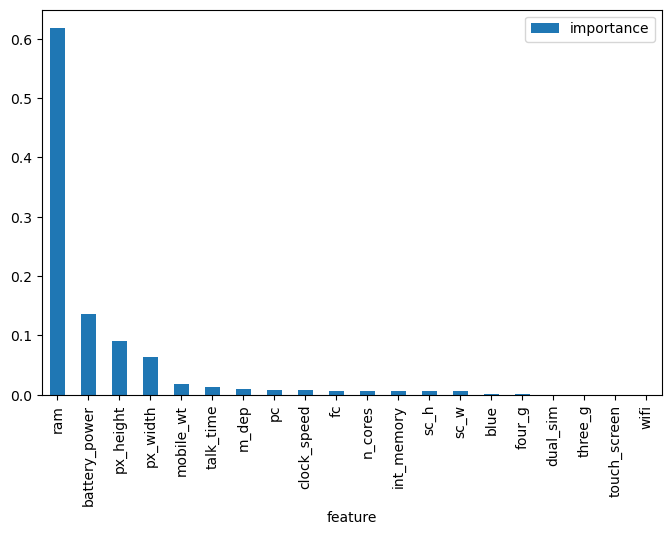

In [64]:
# Plotting features according to its importance
importance_scores_dt = pd.DataFrame({'feature': x.columns, 'importance': np.round(dt_clf.feature_importances_,3)})
importance_scores_dt = importance_scores_dt.sort_values('importance',ascending=False)
importance_scores_dt.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

### 5. XGBoost

In [65]:
# Compute the feature importance scores using a machine learning model
importance_scores_xgb = xgb_model.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_scores_xgb = pd.DataFrame({'Feature': x.columns, 'Importance': importance_scores_xgb})

# Sort the features based on their importance scores in descending order
feature_scores_xgb = feature_scores_gb.sort_values(by='Importance', ascending=False)

# Rank the features based on their importance scores
feature_scores_xgb['Rank'] = np.arange(1, len(x.columns) + 1)

# Display the ranked features
print(feature_scores_xgb[['Rank', 'Feature', 'Importance']]) 

    Rank        Feature  Importance
10     1            ram    0.786308
0      2  battery_power    0.113375
8      3      px_height    0.057278
9      4       px_width    0.023127
5      5      mobile_wt    0.005064
3      6     int_memory    0.004513
4      7          m_dep    0.003089
2      8             fc    0.001807
11     9           sc_h    0.001153
13    10      talk_time    0.001021
12    11           sc_w    0.000929
6     12        n_cores    0.000767
19    13           wifi    0.000431
7     14             pc    0.000374
1     15    clock_speed    0.000292
16    16         four_g    0.000236
18    17   touch_screen    0.000096
14    18           blue    0.000076
17    19        three_g    0.000049
15    20       dual_sim    0.000015


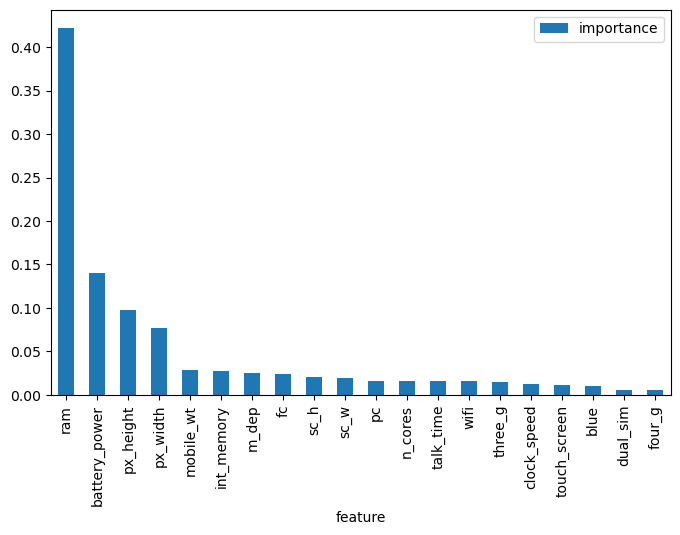

In [66]:
# Plotting features according to its importance
importance_scores_xgb = pd.DataFrame({'feature': x.columns, 'importance': np.round(xgb_model.feature_importances_,3)})
importance_scores_xgb = importance_scores_xgb.sort_values('importance',ascending=False)
importance_scores_xgb.plot.bar(x='feature', figsize=(8,5),fontsize=10)
plt.show()

In [67]:
#Ranking dataset according to price range

df["rank_by_price"]=df["price_range"].rank()
df_rank = df
df_rank

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range,rank_by_price
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,...,0.388889,0.944444,0,0,0,0,0,1,1,750.5
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,...,0.166667,0.277778,1,1,1,1,1,0,2,1250.5
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,...,0.111111,0.388889,1,1,1,1,1,0,2,1250.5
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,...,0.444444,0.500000,1,0,0,1,0,0,2,1250.5
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,...,0.111111,0.722222,1,0,1,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,...,0.222222,0.944444,1,1,1,1,1,0,0,250.5
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,...,0.555556,0.777778,1,1,0,1,1,1,2,1250.5
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,...,0.055556,0.166667,0,1,1,1,1,0,3,1750.5
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,...,0.555556,0.944444,0,0,1,1,1,1,0,250.5


In [68]:
df_rank["rank_by_price"] = df_rank["rank_by_price"].sort_values()
df_rank

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range,rank_by_price
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,...,0.388889,0.944444,0,0,0,0,0,1,1,750.5
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,...,0.166667,0.277778,1,1,1,1,1,0,2,1250.5
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,...,0.111111,0.388889,1,1,1,1,1,0,2,1250.5
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,...,0.444444,0.500000,1,0,0,1,0,0,2,1250.5
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,...,0.111111,0.722222,1,0,1,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,...,0.222222,0.944444,1,1,1,1,1,0,0,250.5
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,...,0.555556,0.777778,1,1,0,1,1,1,2,1250.5
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,...,0.055556,0.166667,0,1,1,1,1,0,3,1750.5
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,...,0.555556,0.944444,0,0,1,1,1,1,0,250.5


In [69]:
#Sorting above dataset according to ranked_price_range

df_rank.sort_values(by=["rank_by_price"])

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range,rank_by_price
1838,0.146293,0.16,0.631579,0.193548,0.777778,0.708333,0.428571,0.70,0.186735,0.489987,...,0.388889,0.055556,1,1,1,1,1,0,0,250.5
1762,0.205077,0.00,0.157895,0.709677,0.444444,0.208333,1.000000,0.75,0.060714,0.019359,...,0.277778,0.444444,1,1,0,1,0,1,0,250.5
419,0.275885,0.16,0.105263,0.032258,0.777778,0.166667,0.142857,0.60,0.097449,0.664219,...,0.388889,0.166667,1,0,0,1,1,0,0,250.5
846,0.659987,0.76,0.421053,0.483871,0.555556,1.000000,0.000000,0.80,0.087755,0.208278,...,0.333333,0.333333,0,1,0,0,0,0,0,250.5
845,0.939212,0.60,0.684211,0.854839,0.888889,0.208333,0.857143,0.75,0.363776,0.676235,...,0.222222,0.833333,0,0,0,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.364061,0.92,0.000000,0.903226,0.111111,0.166667,1.000000,0.00,0.132143,0.360481,...,0.666667,0.388889,1,1,1,1,1,1,3,1750.5
982,0.356713,0.04,0.105263,0.677419,0.444444,0.158333,0.285714,0.15,0.120408,0.974633,...,0.277778,0.555556,0,1,1,1,1,0,3,1750.5
987,0.792919,0.80,0.000000,0.306452,0.111111,0.750000,0.857143,0.00,0.331633,0.242991,...,0.777778,0.333333,0,0,1,1,1,1,3,1750.5
956,0.241149,0.72,0.473684,0.064516,0.000000,0.225000,1.000000,0.70,0.422959,0.985981,...,0.222222,0.388889,0,0,1,1,1,1,3,1750.5


In [70]:
#Ranking on all the features using rank()

RankedData = df_rank.rank()
RankedData.sort_values(by="price_range")

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,638.5,1853.0,432.0,1595.5,1414.5,872.5,1394.5,657.5,978.0,...,1284.5,146.5,1505.5,1491.0,1479.0,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,207.0,993.5,1451.5,1003.0,436.0,1872.5,1492.5,189.0,45.0,...,1008.0,901.0,1505.5,1491.0,479.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,638.5,814.0,77.5,1595.5,325.5,366.0,1212.5,329.5,1341.0,...,1284.5,363.0,1505.5,491.0,479.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,1612.5,1601.0,1011.0,1198.5,1991.0,121.5,1582.5,288.0,408.0,...,1153.5,696.5,505.5,1491.0,479.0,239.0,497.5,493.5,250.5,250.5
845,1875.0,1337.0,1895.5,1727.0,1797.0,436.0,1615.0,1492.5,1231.5,1363.0,...,836.5,1636.5,505.5,491.0,479.0,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1868.0,237.5,1828.5,427.0,325.5,1872.5,51.0,455.0,728.0,...,1797.5,798.5,1505.5,1491.0,1479.0,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,450.5,814.0,1382.0,1003.0,309.0,612.5,351.0,419.5,1937.0,...,1008.0,1106.0,505.5,1491.0,1479.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,1678.5,237.5,669.5,427.0,1496.0,1615.0,51.0,1134.0,481.5,...,1897.0,696.5,505.5,491.0,1479.0,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,1544.5,1678.5,142.0,160.5,472.5,1872.5,1394.5,1371.0,1966.0,...,836.5,798.5,505.5,491.0,1479.0,1239.0,1497.5,1493.5,1750.5,1750.5


In [71]:
#Ranking all the features separately to correct output
#Because not all features are good when values are high or low
#It depends on each and every feature.

r = df_rank
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [72]:
RankedData = r.iloc[:,21:]
RankedData

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5


### Step 7 - Loading Test Dataset

In [73]:
test = pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


### Step 8 - Descriptive Statistics (Test Data)

In [74]:
test.shape

(1000, 21)

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [76]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [77]:
test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [78]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [79]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

#### There are no null values in the dataset

In [80]:
test.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [81]:
test.duplicated().sum()

0

#### There are no duplicated values

In [82]:
# Checking distribution of data
freqgraph1 = test.select_dtypes(include = ['float','int'])
freqgraph1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


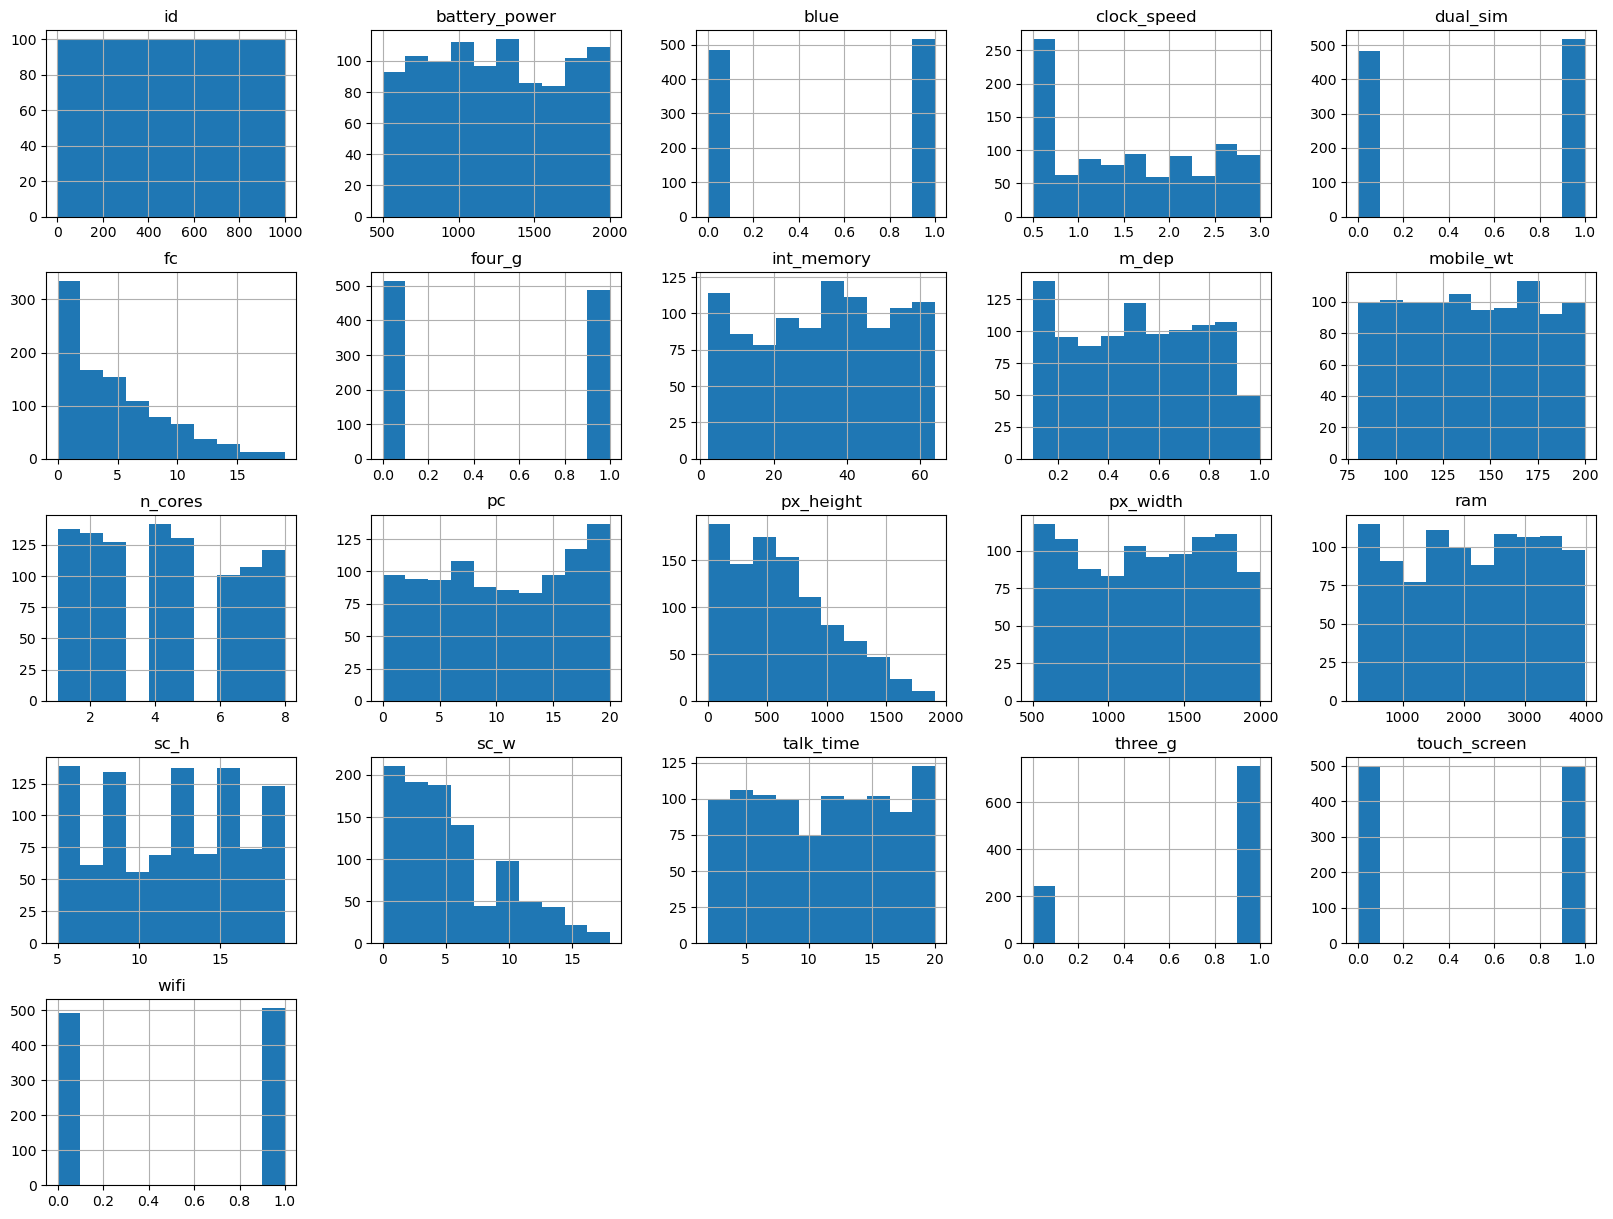

In [83]:
freqgraph1.hist(figsize=(20,15))
plt.show()

### Numerical Variables and Categorical Variables
#### We have 6 categorical variables and 15 numerical variables.
#### Numerical -  id,battery_power, clock_speed, fc , int_memory, m_dep, mobile_wt, pc, px_height, px_width,  ram, sc_h,  sc_h, sc_w, talk_time
#### Categorical - blue, dual_sim, four_g, three_g , touch_screen, wifi

In [84]:
cat_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for i in cat_col:
    print('the number of unique values in',i,'is : ',data[i].value_counts())

the number of unique values in blue is :  0    1010
1     990
Name: blue, dtype: int64
the number of unique values in dual_sim is :  1    1019
0     981
Name: dual_sim, dtype: int64
the number of unique values in four_g is :  1    1043
0     957
Name: four_g, dtype: int64
the number of unique values in three_g is :  1    1523
0     477
Name: three_g, dtype: int64
the number of unique values in touch_screen is :  1    1006
0     994
Name: touch_screen, dtype: int64
the number of unique values in wifi is :  1    1014
0     986
Name: wifi, dtype: int64


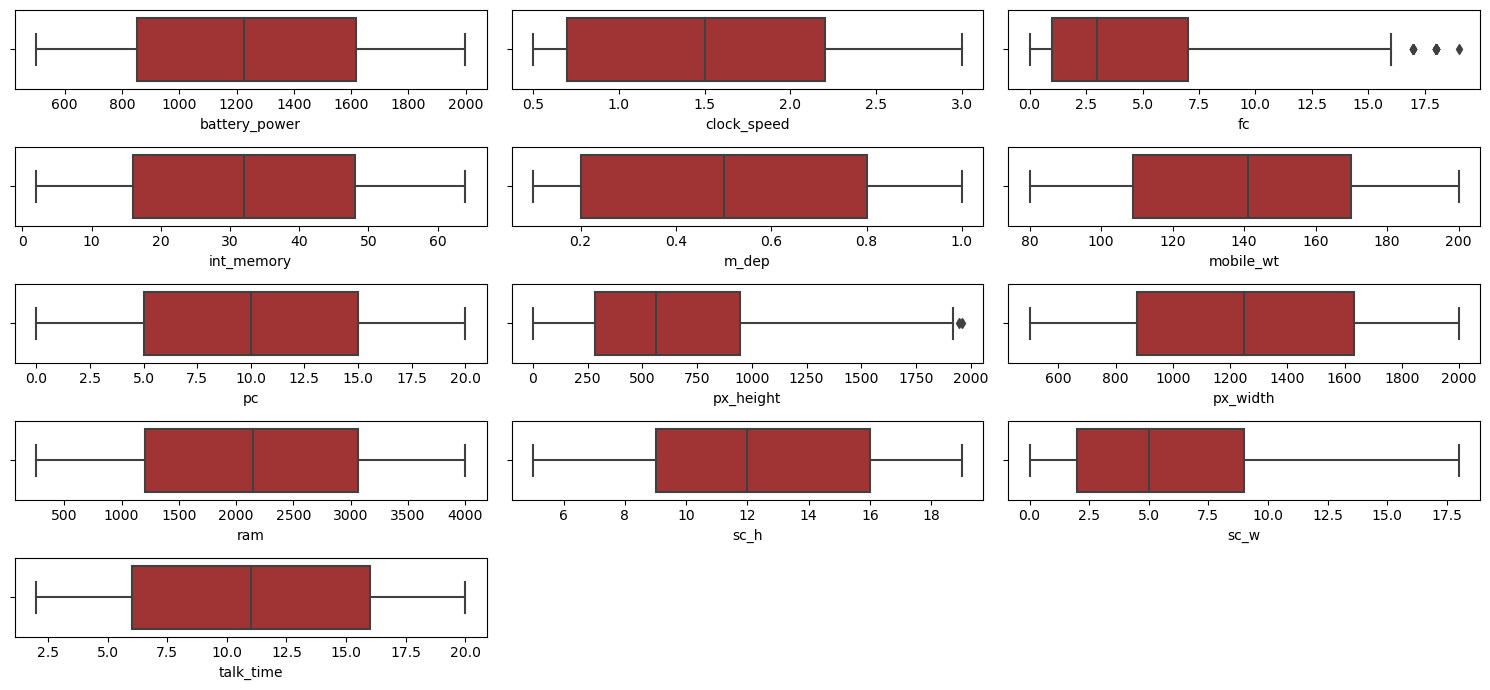

In [85]:
# Checking Outliers

num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[num_col[i]],orient='v', color = '#B22222')
    plt.tight_layout()

#### There are outliers in the columns 'fc', and px_height' . Since these are genuine values we need not replace or remove it.

### Step 9 - Exploratory Data Analysis (Test Data)

In [86]:
test.head(3)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1


### Plotting Categorical Features using Pie Chart

In [87]:
test['blue'].value_counts()

1    516
0    484
Name: blue, dtype: int64

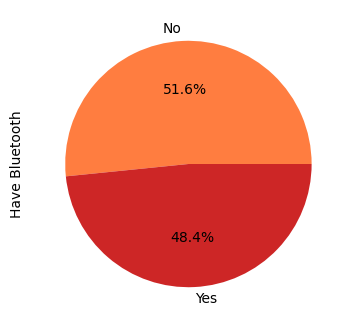

In [88]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
test['blue'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Bluetooth')
plt.show()

In [89]:
test['dual_sim'].value_counts()

1    517
0    483
Name: dual_sim, dtype: int64

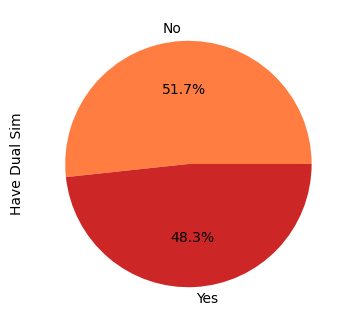

In [90]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
test['dual_sim'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Dual Sim')
plt.show()

In [91]:
test['four_g'].value_counts()

0    513
1    487
Name: four_g, dtype: int64

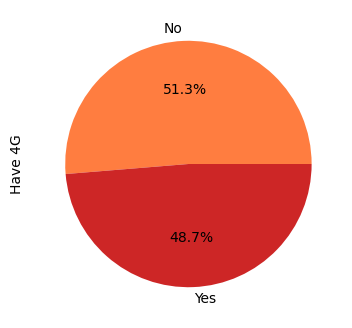

In [92]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
test['four_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have 4G')
plt.show()

In [93]:
test['three_g'].value_counts()

1    756
0    244
Name: three_g, dtype: int64

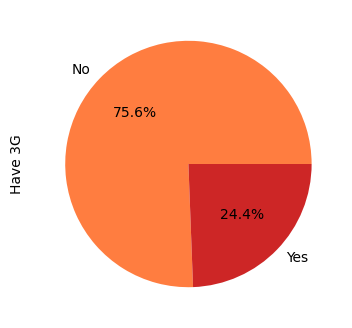

In [94]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
test['three_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have 3G')
plt.show()

In [95]:
test['touch_screen'].value_counts()

1    500
0    500
Name: touch_screen, dtype: int64

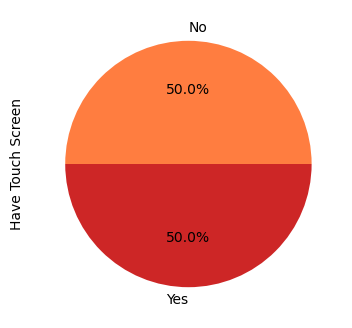

In [96]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
test['touch_screen'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Touch Screen')
plt.show()

In [97]:
test['wifi'].value_counts()

1    507
0    493
Name: wifi, dtype: int64

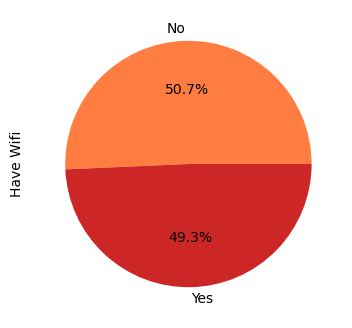

In [98]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
test['wifi'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4), colors = ['#FF7D40','#CD2626'])
plt.ylabel('Have Wifi')
plt.show()

In [99]:
test['n_cores'].value_counts()

4    142
1    138
2    134
5    130
3    127
8    121
7    107
6    101
Name: n_cores, dtype: int64

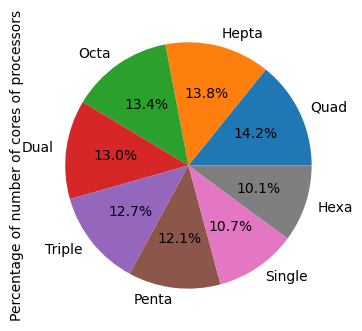

In [100]:
labels=['Quad','Hepta','Octa','Dual','Triple','Penta','Single','Hexa']
plt.figure(figsize=(5,5))
test['n_cores'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Percentage of number of cores of processors')
plt.show()

#### Observation
1. We can see that almost half of the phones have bluetooth, dual sim, 4G, touchscreen and wifi. <br>
2. Almost three-fourth of the phones have 3G. <br>
3. The different types of cores are also spread out almost evenly.<br>

### Count Plot for Various Columns

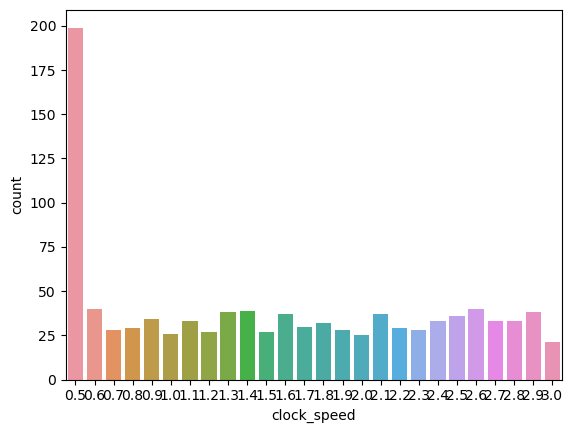

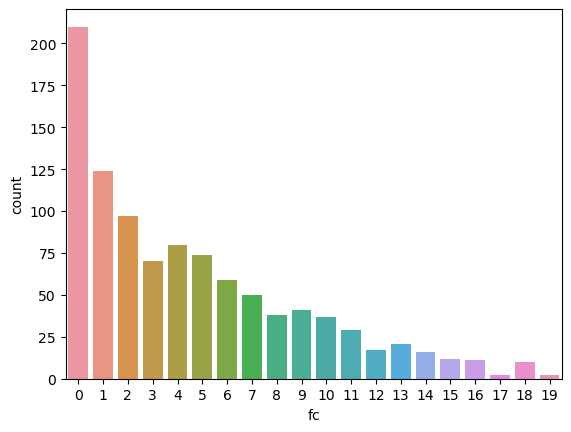

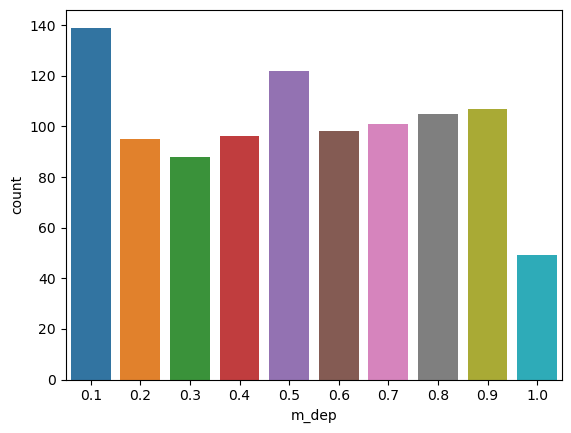

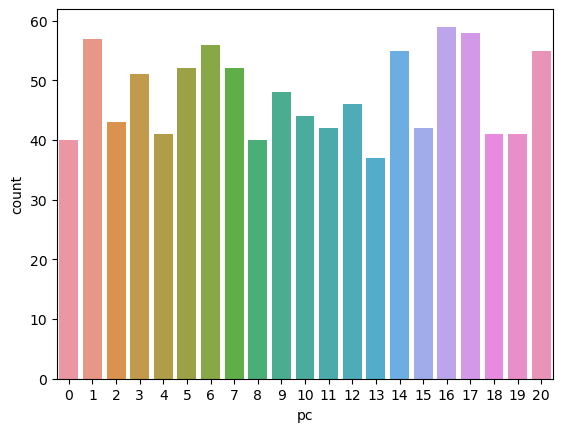

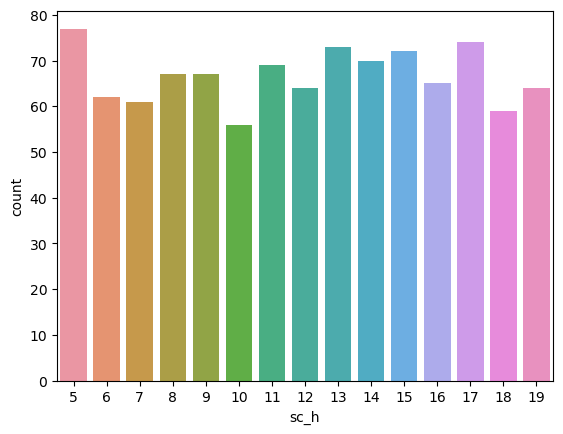

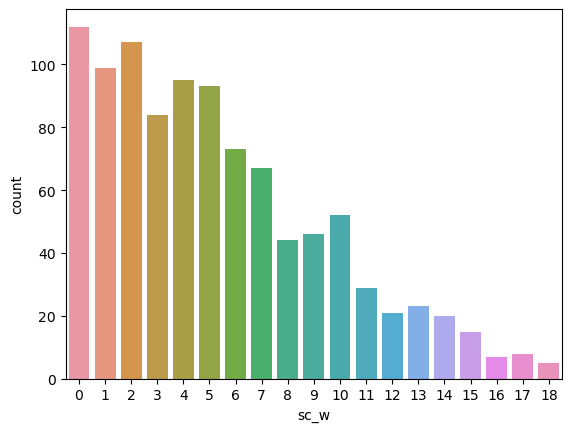

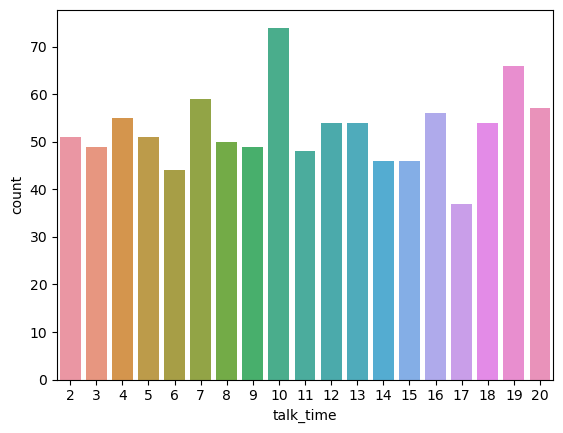

In [101]:
for i in num_col:
    if (test[i].nunique())<= 30:
        sns.countplot(x=test[i])
        plt.show()

### Observation
1. Majority of phones in this dataset have a front camera. Only a quarter of the phone in this dataset does not have front camera. <br>
2. Almost 6 % of phones in this dataset does not have camera. <br>
3. Talktime is evenly spread out. <br>

### Plotting Numerical Features using Histogram

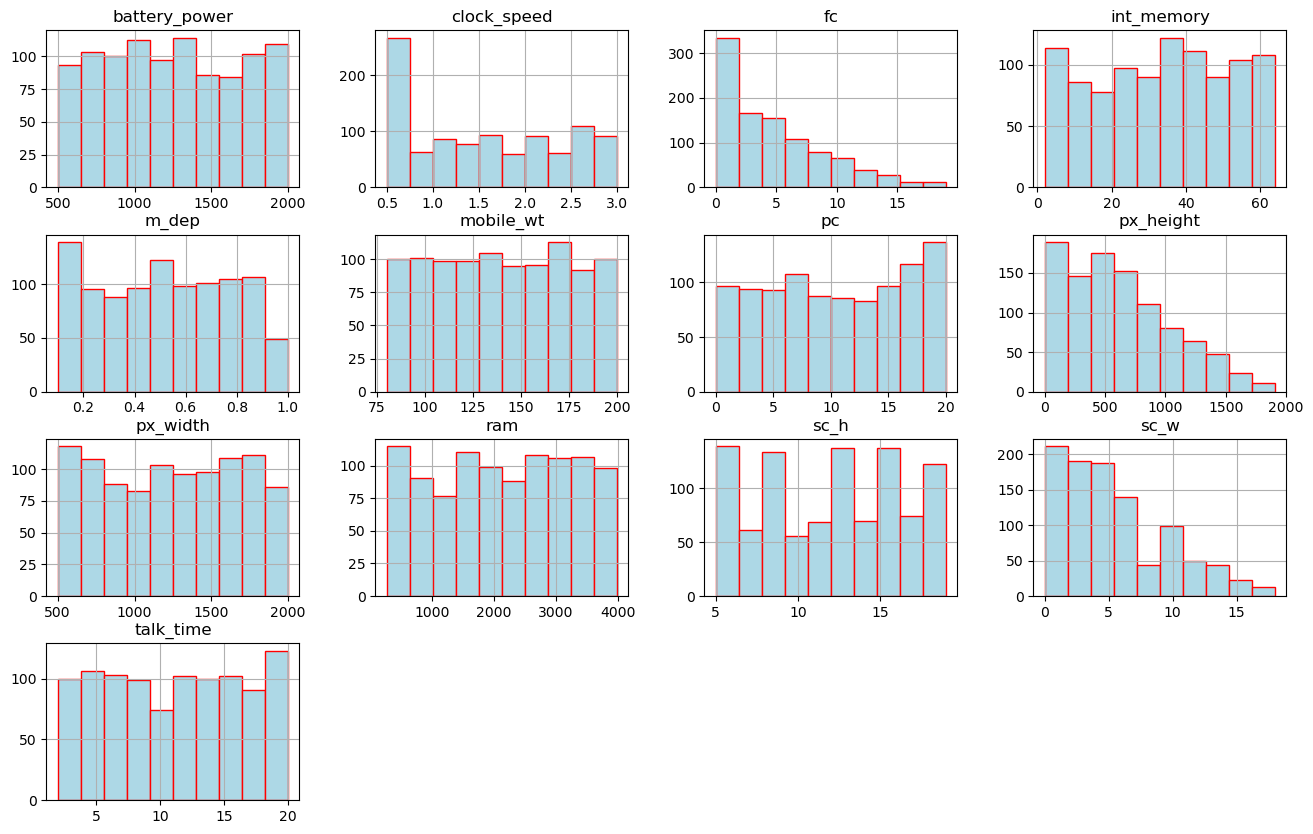

In [102]:
test.hist(num_col,figsize=(16,10), color = "lightblue", ec="red")
plt.show()

#### Observation
1. fc has exponential distribution <br>
2. the pixel height distribution is right skewed. <br>
3. others have multimodal distribution. <br>

### Correlation Matrix

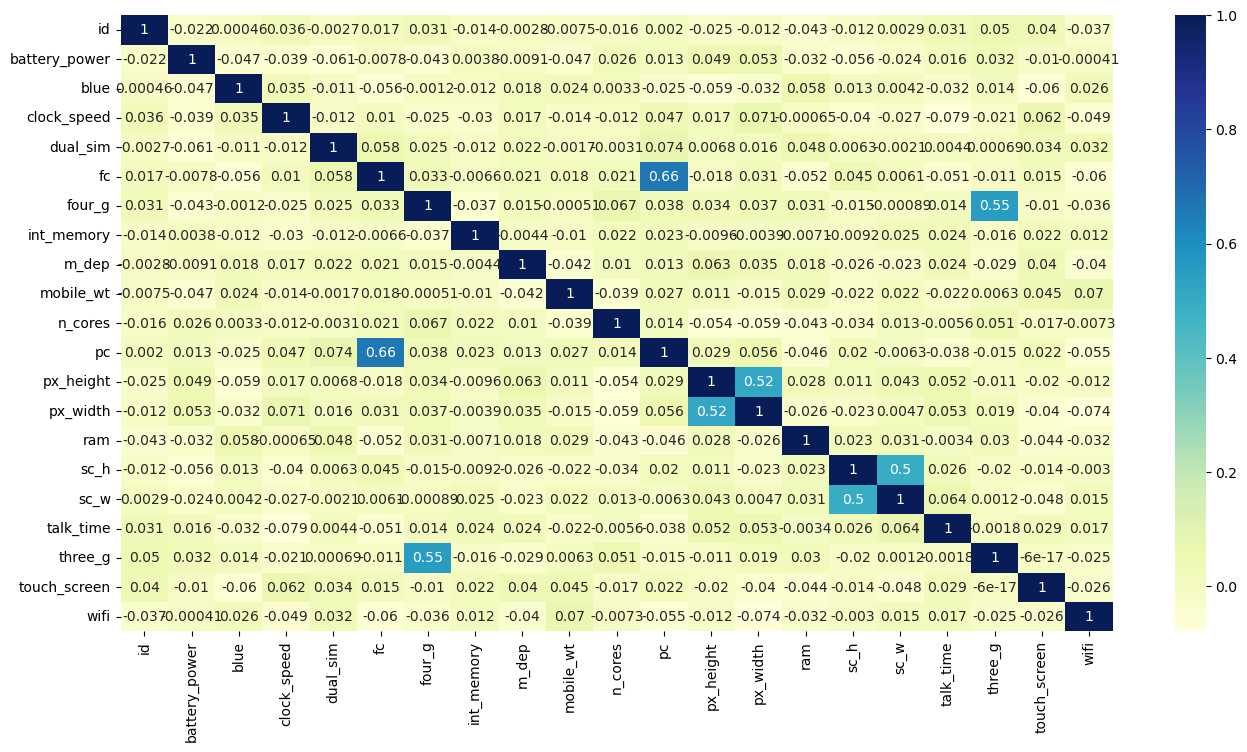

In [103]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(test.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Observation
1. Almost all features exhibit low correlation with each other. <br>
2. pc is highly correlated with fc. <br>

### Step 10 - Data Preprocessing (Test Data)

### Feature Scaling

In [104]:
# Min-max scaling
df_test1 = test.drop(['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],axis=1)
Y = test.drop(['id','blue','dual_sim','four_g','three_g','touch_screen','wifi'], axis=1)
Y

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1043,1.8,14,5,0.1,193,3,16,226,1412,3476,12,7,2
1,841,0.5,4,61,0.8,191,5,12,746,857,3895,6,0,7
2,1807,2.8,1,27,0.9,186,3,4,1270,1366,2396,17,10,10
3,1546,0.5,18,25,0.5,96,8,20,295,1752,3893,10,0,7
4,1434,1.4,11,49,0.5,108,6,18,749,810,1773,15,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1.9,0,54,0.5,170,7,17,644,913,2121,14,8,15
996,609,1.8,0,13,0.9,186,4,2,1152,1632,1933,8,1,19
997,1185,1.4,1,8,0.5,80,1,12,477,825,1223,5,0,14
998,1533,0.5,0,50,0.4,171,2,12,38,832,2509,15,11,6


In [105]:
df_test1

,id,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,1,1,1,0,0,1,0
1,2,1,1,1,1,0,0
2,3,1,0,0,0,1,1
3,4,0,1,1,1,1,0
4,5,0,0,1,1,0,1
...,...,...,...,...,...,...,...
995,996,1,0,1,1,1,0
996,997,0,1,0,0,1,1
997,998,0,0,1,1,0,0
998,999,1,1,0,0,1,0


In [106]:
from sklearn.preprocessing import MinMaxScaler  #importing the required library for MinMax scaling
minmax = MinMaxScaler(feature_range=(0,1))  #creating instance
Y = minmax.fit_transform(Y)  #Performing MinMax scaling
Y

array([[0.36224149, 0.52      , 0.73684211, ..., 0.5       , 0.38888889,
        0.        ],
       [0.22748499, 0.        , 0.21052632, ..., 0.07142857, 0.        ,
        0.27777778],
       [0.87191461, 0.92      , 0.05263158, ..., 0.85714286, 0.55555556,
        0.44444444],
       ...,
       [0.45697131, 0.36      , 0.05263158, ..., 0.        , 0.        ,
        0.66666667],
       [0.68912608, 0.        , 0.        , ..., 0.71428571, 0.61111111,
        0.22222222],
       [0.51367578, 0.        , 0.21052632, ..., 0.28571429, 0.11111111,
        0.05555556]])

In [107]:
Y = pd.DataFrame(Y)         
Y.columns = ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time'] # Giving the columns their respective names
Y

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.362241,0.52,0.736842,0.048387,0.000000,0.941667,0.285714,0.80,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000
1,0.227485,0.00,0.210526,0.951613,0.777778,0.925000,0.571429,0.60,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778
2,0.871915,0.92,0.052632,0.403226,0.888889,0.883333,0.285714,0.20,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444
3,0.697799,0.00,0.947368,0.370968,0.444444,0.133333,1.000000,1.00,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778
4,0.623082,0.36,0.578947,0.758065,0.444444,0.233333,0.714286,0.90,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800534,0.56,0.000000,0.838710,0.444444,0.750000,0.857143,0.85,0.337703,0.275217,0.498658,0.642857,0.444444,0.722222
996,0.072715,0.52,0.000000,0.177419,0.888889,0.883333,0.428571,0.10,0.604090,0.755511,0.448202,0.214286,0.055556,0.944444
997,0.456971,0.36,0.052632,0.096774,0.444444,0.000000,0.000000,0.60,0.250131,0.216433,0.257649,0.000000,0.000000,0.666667
998,0.689126,0.00,0.000000,0.774194,0.333333,0.758333,0.142857,0.60,0.019927,0.221109,0.602791,0.714286,0.611111,0.222222


In [108]:
Y.shape

(1000, 14)

In [109]:
df_test = Y
df_test = pd.concat([df_test,df_test1],axis = 1)
df_test

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,id,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.362241,0.52,0.736842,0.048387,0.000000,0.941667,0.285714,0.80,0.118511,0.608550,...,0.500000,0.388889,0.000000,1,1,1,0,0,1,0
1,0.227485,0.00,0.210526,0.951613,0.777778,0.925000,0.571429,0.60,0.391190,0.237809,...,0.071429,0.000000,0.277778,2,1,1,1,1,0,0
2,0.871915,0.92,0.052632,0.403226,0.888889,0.883333,0.285714,0.20,0.665967,0.577822,...,0.857143,0.555556,0.444444,3,1,0,0,0,1,1
3,0.697799,0.00,0.947368,0.370968,0.444444,0.133333,1.000000,1.00,0.154693,0.835671,...,0.357143,0.000000,0.277778,4,0,1,1,1,1,0
4,0.623082,0.36,0.578947,0.758065,0.444444,0.233333,0.714286,0.90,0.392764,0.206413,...,0.714286,0.444444,0.277778,5,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800534,0.56,0.000000,0.838710,0.444444,0.750000,0.857143,0.85,0.337703,0.275217,...,0.642857,0.444444,0.722222,996,1,0,1,1,1,0
996,0.072715,0.52,0.000000,0.177419,0.888889,0.883333,0.428571,0.10,0.604090,0.755511,...,0.214286,0.055556,0.944444,997,0,1,0,0,1,1
997,0.456971,0.36,0.052632,0.096774,0.444444,0.000000,0.000000,0.60,0.250131,0.216433,...,0.000000,0.000000,0.666667,998,0,0,1,1,0,0
998,0.689126,0.00,0.000000,0.774194,0.333333,0.758333,0.142857,0.60,0.019927,0.221109,...,0.714286,0.611111,0.222222,999,1,1,0,0,1,0


In [110]:
test_data = df_test['id']

### Step 11 - Prediction

### Prediction Using Test Data with Logistic Regression Model

In [111]:
df_test = df_test.drop('id',axis = 1)

In [112]:
ypred_lr = model_lr.predict(df_test)

In [113]:
final_test = pd.DataFrame(test_data,columns=['id'])
ypred_lr = pd.DataFrame(ypred_lr,columns=['price_range'])
final_test = final_test.join(ypred_lr)
final_test.head()

,id,price_range
0,1,2
1,2,3
2,3,2
3,4,3
4,5,1
